In [1]:
import pandas as pd
import os
import numpy as np
import cv2
from tqdm import tqdm
from glob import glob
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
_KVASIR_CAPSULE = 'D:\\data\\endoscopic\\kvasir_capsule'
_KVASIR_CAPSULE_DEFORM = 'D:\\data\\endoscopic\\kvasir_capsule_deform'

_HYPER_KVASIR = 'D:\\data\\endoscopic\\hyper_kvasir'

In [8]:
# categories_path = glob(os.path.join(_HYPER_KVASIR,'*'))
# categories_path

In [7]:
df_anno = pd.read_csv(os.path.join(_HYPER_KVASIR,'labeled-images','image-labels.csv'))
df_anno.head()

,Video file,Organ,Finding,Classification
0,000e3fee-7f5c-4819-9f9c-4c983b68888a,Lower GI,cecum,anatomical-landmarks
1,001a41c2-2a5d-40b1-8fd5-b5f2f292277b,Lower GI,cecum,anatomical-landmarks
2,006af0aa-2044-4477-964d-10d9e043fb78,Lower GI,cecum,anatomical-landmarks
3,00832522-ab8e-4b98-bfce-93a777929571,Lower GI,cecum,anatomical-landmarks
4,012ab888-64e6-4361-9745-f52b4a03ba75,Lower GI,cecum,anatomical-landmarks


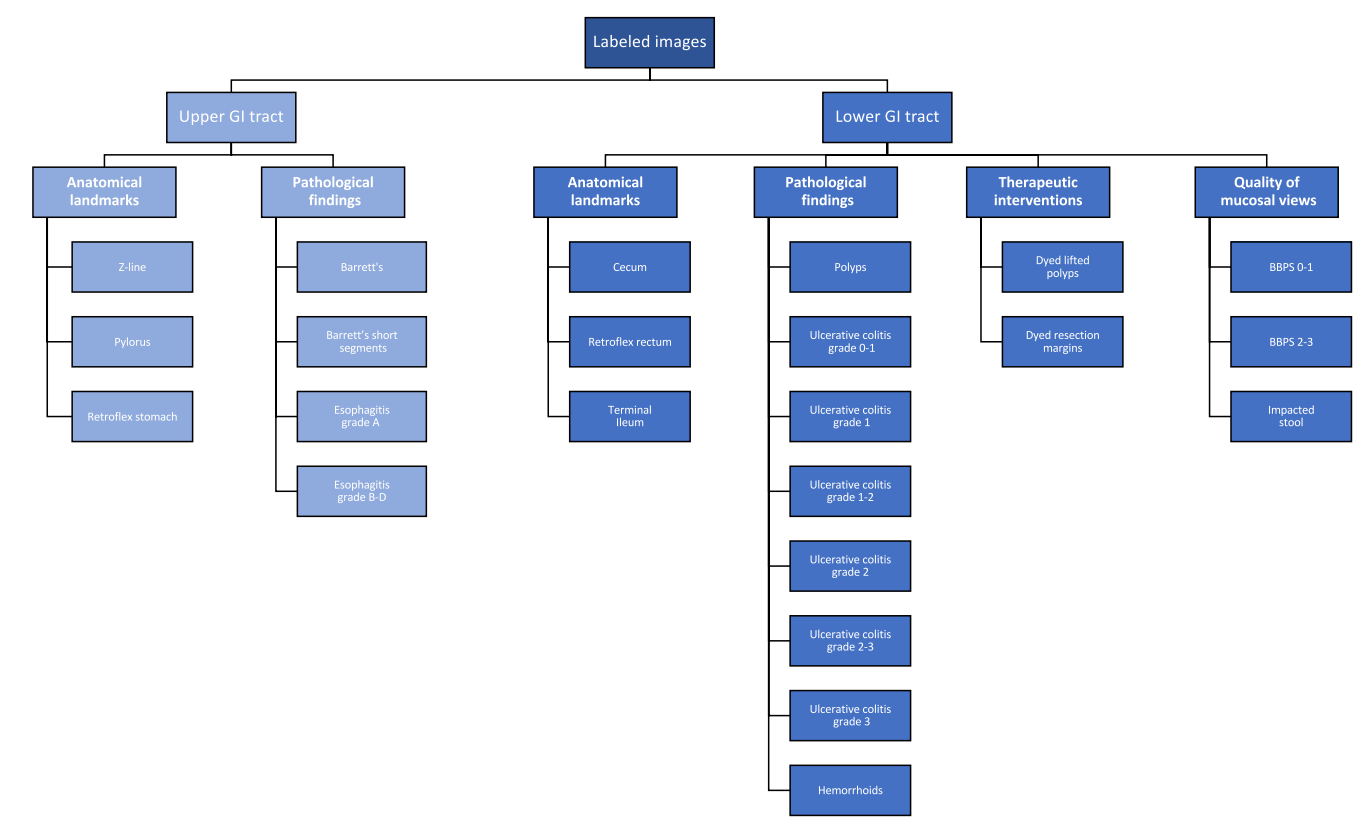

In [10]:
df_anno['Classification'].value_counts()

anatomical-landmarks         4104
pathological-findings        2642
therapeutic-interventions    1991
quality-of-mucosal-views     1925
Name: Classification, dtype: int64

In [37]:
df_pathologies = df_anno[((df_anno['Organ']=='Upper GI') | (df_anno['Organ']=='Lower GI')) & (df_anno['Classification']=='pathological-findings')]
df_pathologies = df_pathologies.reset_index()
df_pathologies

,index,Video file,Organ,Finding,Classification
0,1409,01577b97-7e95-48a9-b722-0da9d2cca313,Lower GI,hemorrhoids,pathological-findings
1,1410,03fac64b-d4da-4f5c-a78f-091682c809ca,Lower GI,hemorrhoids,pathological-findings
2,1411,345c9568-1ec1-4456-b58d-73f9a9f3d548,Lower GI,hemorrhoids,pathological-findings
3,1412,91ffae20-72a8-4864-a4bc-6edc085f8b54,Lower GI,hemorrhoids,pathological-findings
4,1413,9b4c6d39-5302-4ce9-9f36-b616387e3e6d,Lower GI,hemorrhoids,pathological-findings
...,...,...,...,...,...
2637,10657,f7dd198b-88f0-4566-b8f4-81c8c2fee1ed,Upper GI,esophagitis-b-d,pathological-findings
2638,10658,f9a06ca3-3500-4e5e-ac46-110b52963a99,Upper GI,esophagitis-b-d,pathological-findings
2639,10659,fb31e2c2-c8db-42b3-bbf1-564e42076a8e,Upper GI,esophagitis-b-d,pathological-findings
2640,10660,fe6c191e-3da0-4f18-9e38-8f7a11097a3b,Upper GI,esophagitis-b-d,pathological-findings


In [41]:
list_cat = list(set(df_pathologies['Finding']))
dict_cat = {}
for cat in list_cat:
    dict_cat[cat] = list_cat.index(cat)
df_pathologies['Categories'] = [dict_cat[item] for item in df_pathologies['Finding']]
df_pathologies

,index,Video file,Organ,Finding,Classification,Categories
0,1409,01577b97-7e95-48a9-b722-0da9d2cca313,Lower GI,hemorrhoids,pathological-findings,7
1,1410,03fac64b-d4da-4f5c-a78f-091682c809ca,Lower GI,hemorrhoids,pathological-findings,7
2,1411,345c9568-1ec1-4456-b58d-73f9a9f3d548,Lower GI,hemorrhoids,pathological-findings,7
3,1412,91ffae20-72a8-4864-a4bc-6edc085f8b54,Lower GI,hemorrhoids,pathological-findings,7
4,1413,9b4c6d39-5302-4ce9-9f36-b616387e3e6d,Lower GI,hemorrhoids,pathological-findings,7
...,...,...,...,...,...,...
2637,10657,f7dd198b-88f0-4566-b8f4-81c8c2fee1ed,Upper GI,esophagitis-b-d,pathological-findings,10
2638,10658,f9a06ca3-3500-4e5e-ac46-110b52963a99,Upper GI,esophagitis-b-d,pathological-findings,10
2639,10659,fb31e2c2-c8db-42b3-bbf1-564e42076a8e,Upper GI,esophagitis-b-d,pathological-findings,10
2640,10660,fe6c191e-3da0-4f18-9e38-8f7a11097a3b,Upper GI,esophagitis-b-d,pathological-findings,10


In [50]:
df_pathologies.head(10)

,index,Video file,Organ,Finding,Classification,Categories
0,1409,01577b97-7e95-48a9-b722-0da9d2cca313,Lower GI,hemorrhoids,pathological-findings,7
1,1410,03fac64b-d4da-4f5c-a78f-091682c809ca,Lower GI,hemorrhoids,pathological-findings,7
2,1411,345c9568-1ec1-4456-b58d-73f9a9f3d548,Lower GI,hemorrhoids,pathological-findings,7
3,1412,91ffae20-72a8-4864-a4bc-6edc085f8b54,Lower GI,hemorrhoids,pathological-findings,7
4,1413,9b4c6d39-5302-4ce9-9f36-b616387e3e6d,Lower GI,hemorrhoids,pathological-findings,7
5,1414,e40264e5-b101-44ad-ae99-5f5fd038202f,Lower GI,hemorrhoids,pathological-findings,7
6,1415,0004a718-546c-41c2-9c69-c4685093a039,Lower GI,polyps,pathological-findings,3
7,1416,0017b7c7-90f8-4de2-8723-1d87e5c58317,Lower GI,polyps,pathological-findings,3
8,1417,003883b8-e23a-4bf8-a4b9-5f2a30b9e684,Lower GI,polyps,pathological-findings,3
9,1418,0048d8c5-b59d-461c-9834-f44a727e191d,Lower GI,polyps,pathological-findings,3


In [ ]:
'D:\data\endoscopic\hyper_kvasir\labeled-images\upper-gi-tract\pathological-findings\barretts'

In [52]:
dict_cat

{'ulcerative-colitis-grade-1-2': 0,
 'barretts': 1,
 'ulcerative-colitis-grade-0-1': 2,
 'polyps': 3,
 'ulcerative-colitis-grade-3': 4,
 'barretts-short-segment': 5,
 'ulcerative-colitis-grade-1': 6,
 'hemorrhoids': 7,
 'ulcerative-colitis-grade-2': 8,
 'esophagitis-a': 9,
 'esophagitis-b-d': 10,
 'ulcerative-colitis-grade-2-3': 11}

In [51]:
df_pathologies['Categories'].value_counts()

3     1028
8      443
9      403
10     260
6      201
4      133
5       53
1       41
2       35
11      28
0       11
7        6
Name: Categories, dtype: int64

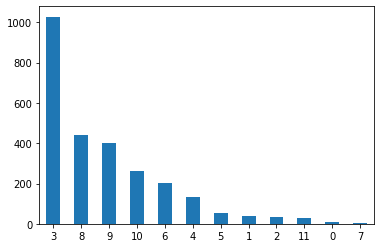

In [48]:
df_pathologies['Categories'].value_counts().plot(kind='bar');
plt.xticks(rotation=0);

In [49]:
# categories = [item.split('\\')[-1] for item in categories_path]
# categories

In [9]:
df_anno = pd.DataFrame([])
list_path = []
list_target = []
for _id, p in tqdm(enumerate(categories_path)):
    imgs = glob(os.path.join(p,'*'))
    list_path += ['/'.join(item.split('\\')[-2:]) for item in imgs]
    list_target += [_id]*len(imgs)
df_anno['path'] = list_path
df_anno['target'] = list_target

14it [00:02,  5.06it/s]


In [20]:
df_anno['target'].value_counts()

9     34338
7      4189
12     2906
11     1529
1       866
13      854
6       776
8       592
4       506
2       446
5       159
10       55
3        12
0        10
Name: target, dtype: int64

In [22]:
df_train, df_valid = train_test_split(df_anno, test_size=0.2, random_state=42)
df_train['is_valid'] = False
df_valid['is_valid'] = True
df_full = pd.concat([df_train, df_valid], axis=0)

C:\Users\Admin\anaconda3\envs\cls\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\anaconda3\envs\cls\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
df_train.head()

,path,target,is_valid
18137,Normal clean mucosa/5e59c7fdb16c4228_8238.jpg,9,False
42088,Pylorus/0531325b64674948_3516.jpg,11,False
5989,Ileocecal valve/af9bd7d0e43741e3_30205.jpg,7,False
37193,Normal clean mucosa/eb0203196e284797_3286.jpg,9,False
11438,Normal clean mucosa/131368cc17e44240_4399.jpg,9,False


In [60]:
df_full.to_csv('../resource/kvasir_capsule/df_train_valid.csv', index=False, header=True)

## Handle unbalance

In [25]:
num_median = int(df_train['target'].value_counts().median())
num_median

546

In [26]:
df_train_sampling = pd.DataFrame([])
for cls in range(len(categories)):
    df_ = df_train[df_train['target']==cls]
    if len(df_) > num_median:
        ## undersampling
        df_samp = df_.sample(num_median)
    else:
        ## oversampling
        df_samp = df_.sample(num_median, replace=True)
    df_train_sampling = pd.concat([df_train_sampling, df_samp], axis=0)

In [28]:
df_train_sampling['target'].value_counts()

11    546
7     546
3     546
10    546
6     546
2     546
13    546
9     546
5     546
1     546
12    546
8     546
4     546
0     546
Name: target, dtype: int64

In [29]:
df_full_balance = pd.concat([df_train_sampling, df_valid], axis=0)
df_full_balance.to_csv('../resource/kvasir_capsule/df_train_valid_balance.csv', index=False, header=True)

## Preprocessing

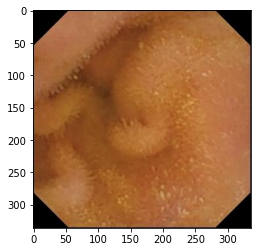

In [32]:
ex_img = cv2.imread(os.path.join(_KVASIR_CAPSULE, df_train['path'].iloc[0]))
ex_img = cv2.cvtColor(ex_img, cv2.COLOR_BGR2RGB)
plt.imshow(ex_img)

In [54]:
"""
radius = 282.5;
[X,Y] = meshgrid([-radius:1:radius]/radius,[-radius:1:radius]/radius);
X = X(((radius+0.5)*2-512)/2+1:radius+256.5,((radius+0.5)*2-512)/2+1:radius+256.5);
Y = Y(((radius+0.5)*2-512)/2+1:radius+256.5,((radius+0.5)*2-512)/2+1:radius+256.5);
%[X,Y] = meshgrid([-255.5:1:255.5]/255.5,[-255.5:1:255.5]/255.5);
U = X .* sqrt(1-Y.^2/2.0);
V = Y .* sqrt(1-X.^2/2.0);
flow = zeros([512,512,2]);
flow(:,:,1) = (-X+U)*radius;
flow(:,:,2) = (-Y+V)*radius;
"""
def deformation(img):
    h, w = img.shape[:2]
    xcent = w / 2
    ycent = h / 2

    # set up the maps as float32 from output square (x,y) to input circle (u,v)
    map_u = np.zeros((h, w), np.float32)
    map_v = np.zeros((h, w), np.float32)

    # create u and v maps where x,y is measured from the center and scaled from -1 to 1
    for y in range(h):
        y_norm = (y - ycent)/ycent
        for x in range(w):
            x_norm = (x - xcent)/xcent
            map_u[y, x] = xcent * x_norm * np.sqrt(1 - 0.5*y_norm**2) + xcent
            map_v[y, x] = ycent * y_norm * np.sqrt(1 - 0.5*x_norm**2) + ycent
    img_deform = cv2.remap(img, map_u, map_v, cv2.INTER_LINEAR, borderMode = cv2.BORDER_REFLECT_101, borderValue=(0,0,0))
    return img_deform

In [68]:
# df_full['path']

In [72]:
# for img_path in tqdm(df_full['path']):
#     img_path = os.path.join(_KVASIR_CAPSULE, img_path)
#     img = cv2.imread(img_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img_deform = deformation(img)
#     img_deform = cv2.cvtColor(img_deform, cv2.COLOR_RGB2BGR)
#     dest_path = img_path.replace('capsule','capsule_deform').replace('/','\\')
#     if not os.path.isdir('\\'.join(dest_path.split('\\')[:-1])):
#         os.mkdir('\\'.join(dest_path.split('\\')[:-1]))
#     cv2.imwrite(dest_path, img_deform)

100%|██████████████████████████████████████████████████████| 47238/47238 [5:48:31<00:00,  2.26it/s]


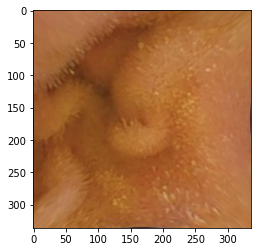

In [56]:
plt.imshow(deformation(ex_img))